In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
users = pd.read_csv('/Users/andrii.pr/Desktop/users.csv')
duration = pd.read_csv('/Users/andrii.pr/Desktop/duration.csv')
views = pd.read_csv('/Users/andrii.pr/Desktop/views.csv')

In [3]:
users.head()

,date,users
0,01.01.2023,1 249
1,02.01.2023,1 560
2,03.01.2023,2 481
3,04.01.2023,2 365
4,05.01.2023,3 062


In [4]:
users['users'] = users['users'].str.replace('\xa0', '').str.replace(' ', '').astype(int)

In [5]:
users.head()

,date,users
0,01.01.2023,1249
1,02.01.2023,1560
2,03.01.2023,2481
3,04.01.2023,2365
4,05.01.2023,3062


In [6]:
views.head()

,date,views
0,01.01.2023,5 128
1,02.01.2023,6 557
2,03.01.2023,11 637
3,04.01.2023,11 159
4,05.01.2023,16 746


In [7]:
views['views'] = views['views'].str.replace('\xa0', '').str.replace(' ', '').astype(int)

In [8]:
views.head()

,date,views
0,01.01.2023,5128
1,02.01.2023,6557
2,03.01.2023,11637
3,04.01.2023,11159
4,05.01.2023,16746


In [9]:
duration.head()

,date,duration
0,01.01.2023,0:02:36
1,02.01.2023,0:02:49
2,03.01.2023,0:03:03
3,04.01.2023,0:03:06
4,05.01.2023,0:03:24


In [10]:
duration['duration'] = pd.to_timedelta(duration['duration']).dt.total_seconds()

In [11]:
duration.head()

,date,duration
0,01.01.2023,156.0
1,02.01.2023,169.0
2,03.01.2023,183.0
3,04.01.2023,186.0
4,05.01.2023,204.0


In [23]:
def draw_anomaly(data, anomaly):
    date, prop, _ = data.columns
    plt.plot(data[date], data[prop], label=prop)
    plt.scatter(anomaly[date], anomaly[prop], color='red', label='anomalies')
    plt.title(f'{prop} anomalies')
    plt.xlabel(date)
    plt.ylabel(prop)
    plt.legend()
    plt.grid(True)
    plt.show()

In [24]:
users['zscore'] = zscore(users['users'])
views['zscore'] = zscore(views['views'])
duration['zscore'] = zscore(duration['duration'])

In [25]:
anomalies_users = users[abs(users['zscore']) > 3]
anomalies_views = views[abs(views['zscore']) > 3]
anomalies_duration = duration[abs(duration['zscore']) > 3]

In [26]:
def isolation_forest(data):
    prop = data.columns[1]
    if_ = IsolationForest(n_estimators=100, contamination='auto')
    return data[if_.fit_predict(data[[prop]]) == -1]

In [27]:
if_anomalies_users = isolation_forest(users)
if_anomalies_views = isolation_forest(views)
if_anomalies_duration = isolation_forest(duration)

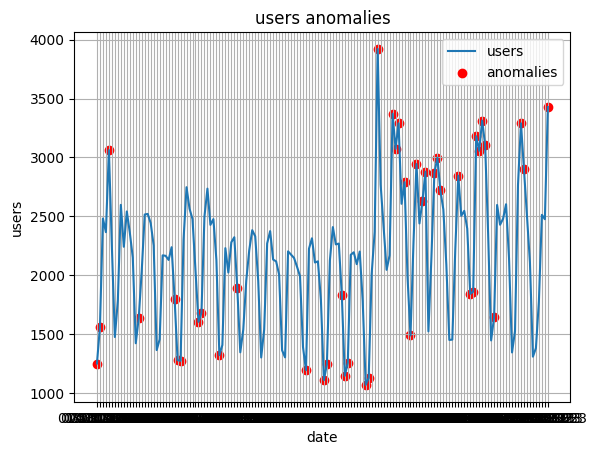

In [30]:
draw_anomaly(users, if_anomalies_users)

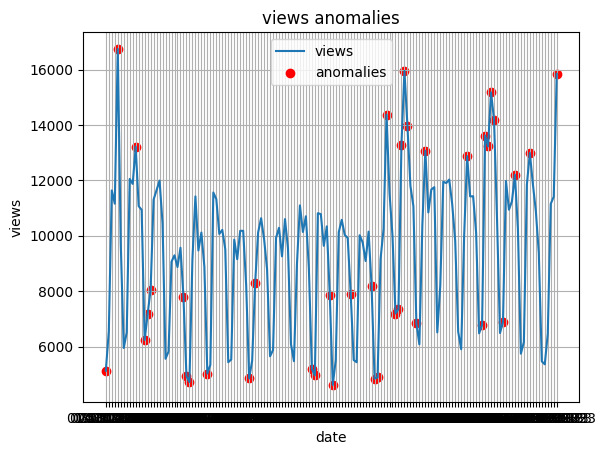

In [31]:
draw_anomaly(views, if_anomalies_views)

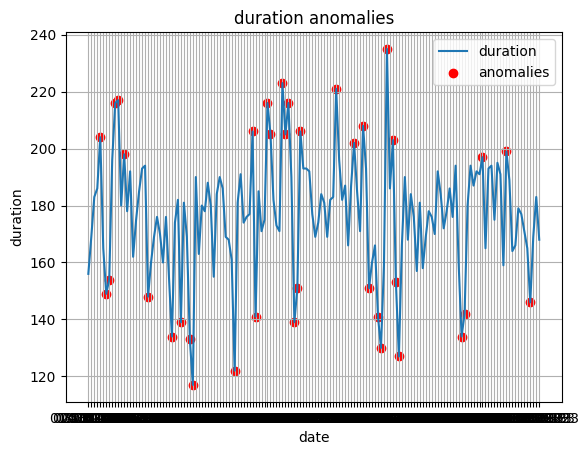

In [32]:
draw_anomaly(duration, if_anomalies_duration)

In [33]:
def lof(data):
    prop = data.columns[1]
    lof_ = LocalOutlierFactor(n_neighbors=20, contamination='auto')
    return data[lof_.fit_predict(data[[prop]]) == -1]

In [34]:
lof_anomalies_users = lof(users)
lof_anomalies_views = lof(views)
lof_anomalies_duration = lof(duration)

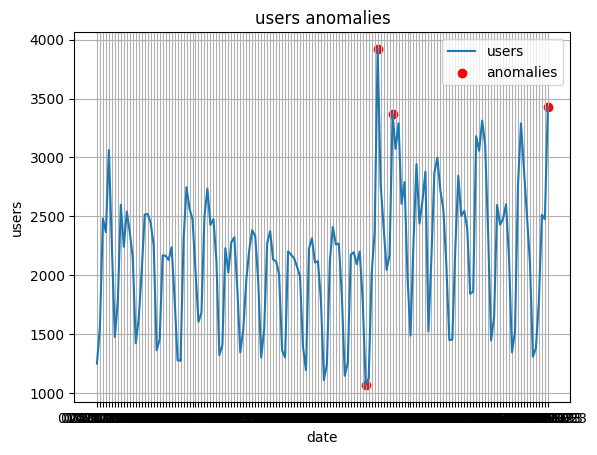

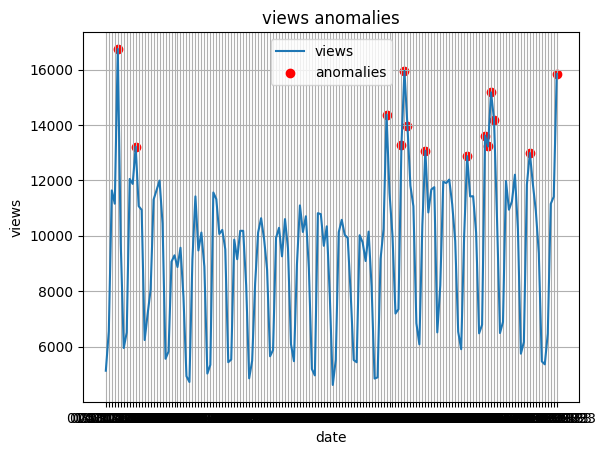

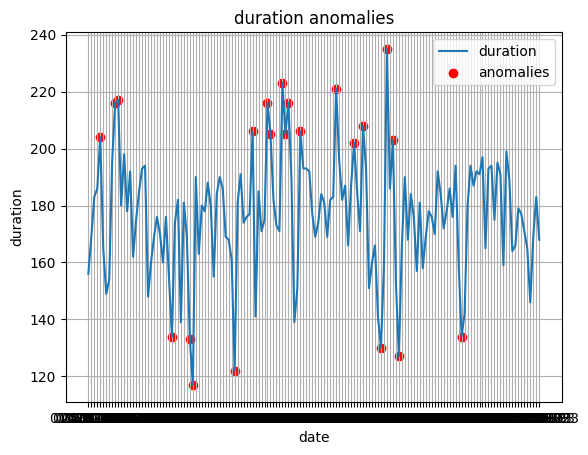

In [35]:
draw_anomaly(users, lof_anomalies_users)
draw_anomaly(views, lof_anomalies_views)
draw_anomaly(duration, lof_anomalies_duration)
